In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

# Text Analysis (Word Vector Analysis) of Book Summary Dataset

I used a set of book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html).  This contains a large number of summaries (16,559) but I worked with just the first 100 books.

In [2]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("Data/booksummaries/booksummaries.txt", sep="\t", header=None, names=names)

# select just the first 100 books
books = books[:100]

books.head()

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [3]:
books

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...,...,...,...
95,31431,/m/07qs_,The Book of the City of Ladies,NaN,NaN,NaN,Part I opens with Christine reading from Math...
96,31434,/m/07qv5,The Sentinel,Arthur C. Clarke,1951,"{""/m/014dfn"": ""Speculative fiction""}",The story deals with the discovery of an arti...
97,31435,/m/07qvl,The Fountains of Paradise,Arthur C. Clarke,1979,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","In the 22nd century, Dr Vannevar Morgan is a ..."
98,31584,/m/07s0_,Lord of the Flies,William Golding,1954,"{""/m/014dfn"": ""Speculative fiction"", ""/m/03mfn...","In the midst of a wartime evacuation, a Briti..."


In [4]:
# Computing the numerical features of the text
vectorizer = TfidfVectorizer(max_features=50)
X = vectorizer.fit_transform(books.summary).toarray()
X.shape

(100, 50)

In [5]:
print(vectorizer.get_feature_names())
len(vectorizer.get_feature_names())

['about', 'after', 'all', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'for', 'from', 'god', 'had', 'has', 'have', 'he', 'her', 'him', 'his', 'in', 'into', 'is', 'it', 'not', 'of', 'on', 'one', 'or', 'out', 'she', 'that', 'the', 'their', 'them', 'then', 'they', 'this', 'to', 'two', 'up', 'was', 'when', 'where', 'which', 'who', 'will', 'with']


50

# Hierarchical Clustering of Word Vectors

In [6]:
dist = pdist(X, 'euclidean')
print(dist)
print(len(dist))
linkage_matrix = linkage(dist, method = 'ward')

[0.3505848  0.23706417 0.4864717  ... 0.38342147 0.45620081 0.39611752]
4950


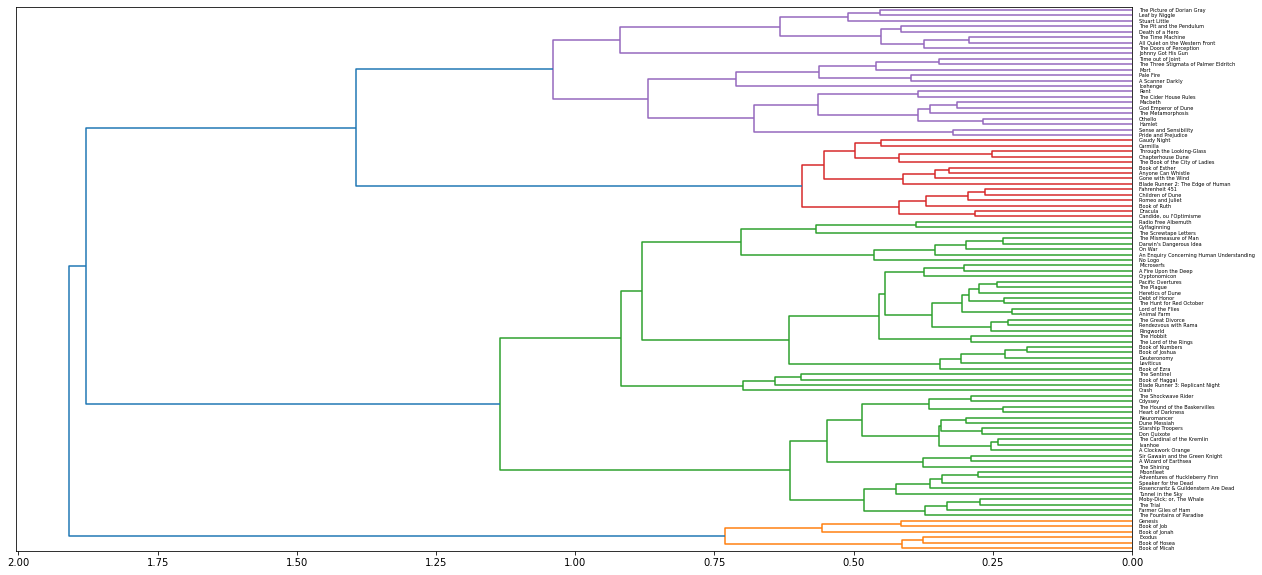

In [7]:
# For book titles
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, labels=list(books.title), orientation='left')
plt.show()

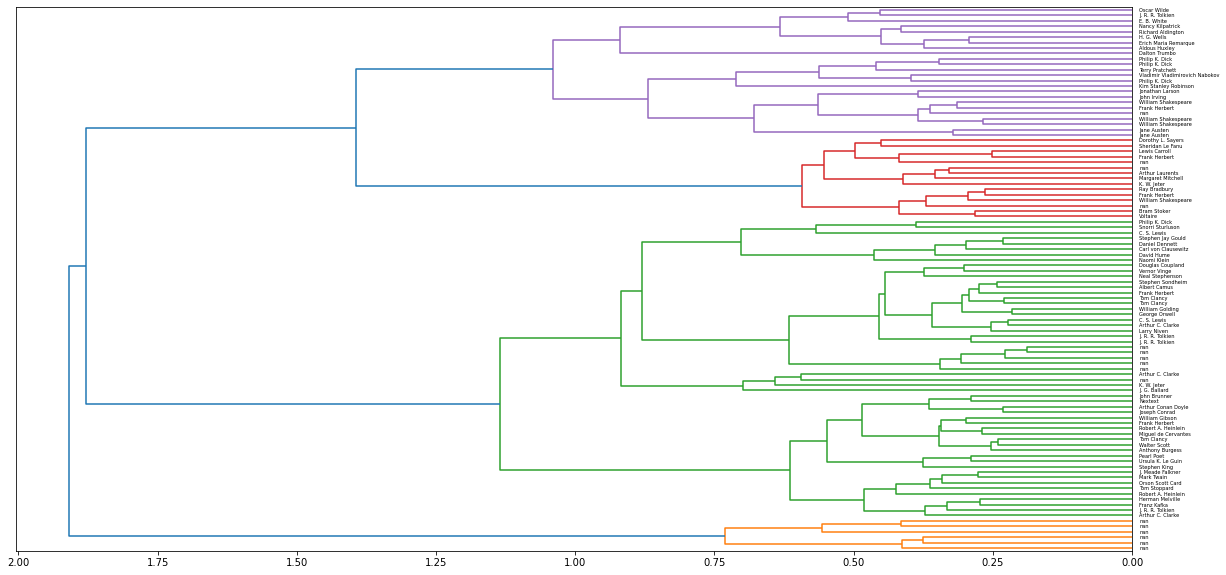

In [8]:
# For book authors
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, labels=list(books.author), orientation='left')
plt.show()

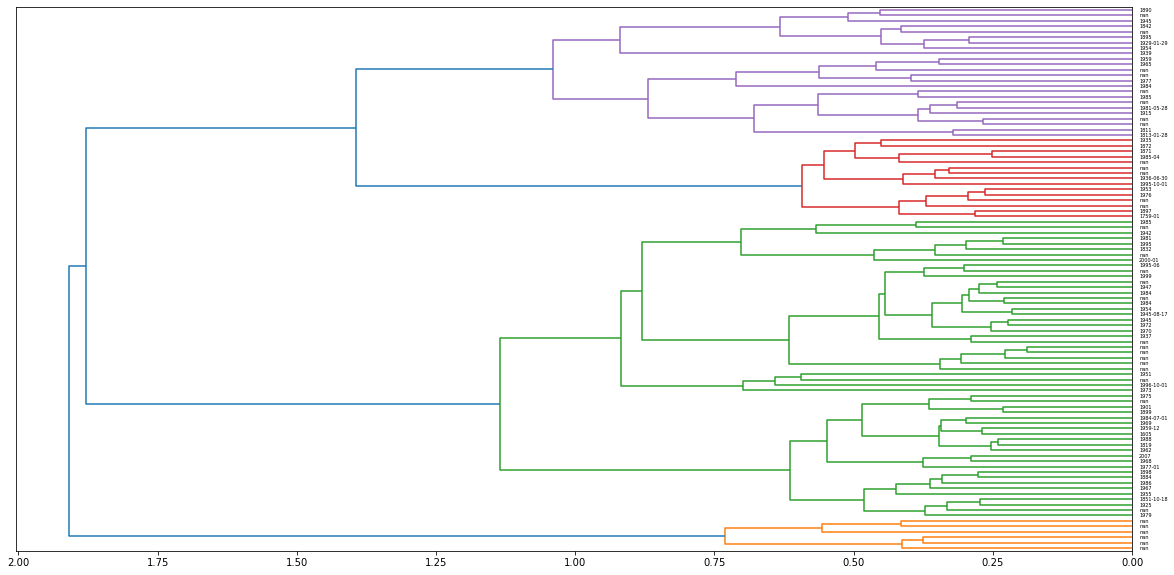

In [9]:
# For book date
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, labels=list(books.date), orientation='left')
plt.show()